<a href="https://colab.research.google.com/github/andrevramos/hw2-AVR-4580/blob/main/4580_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ORIE 4580/5580/5581 Assignment 3

#### Students: Andre Ramos (avr35)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)

(**Please replace this with your own link!**)

### Instructions


* Due Thursday September 25, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 7 (you can skim through this), and chapters 8 and 9 of [Introduction to Probability](https://chance.dartmouth.edu/teaching_aids/books_articles/probability_book/book.html) by Grinstead and Snell.

Chapter 3 and chapter 4 (up to section 4.5) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

In [2]:
#importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
%matplotlib inline

ChatGPT was used to help with markdown and code

<hr><hr>

## Question 1: Combining LCGs (20 points)

In order to avoid biases, simulations should not use anywhere near the full period of an LCG (otherwise, the random sequence repeats\ldots). For example, a typical traffic simulator may have $10,000$ vehicles, each experiencing thousands of random disturbances, thus needing around $10^7$ random samples per replication -- for this, an LCG using $m=2^{31}-1\approx 2\times 10^9$ is insufficient, as after $100$ replications the sequences get correlated.

One method to combine multiple LCGs to obtain a generator with a longer period is to add a smaller period LCG to it. For example, suppose we have two generators $X_{n+1}  =  (a_1 X_n) \mbox{ mod } m_1$ and $Y_{n+1}  =  (a_2 Y_n) \mbox{ mod } m_2$, with $m_1>m_2$. We can derive a combined generator by setting $Z_n  =  (X_n + Y_n) \mbox{ mod } m_1$. If properly designed, the resulting period can be on the order of $m_1m_2$. We will now study a small example to see how this works.


<hr>

**(a)** Consider two LCGs, $x_{n+1} = (5 x_n) \mod 16$ and $y_{n+1} = (2 y_n) \mod 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n, y_n$ using the clock visualization introduced in class (separate plot for each sequence; you can use and modify the code in Demo-PRNGs.ipynb on Canvas).

<hr>

In [3]:
# Functions to visualize LCG sequence on clock (see demo notebook)
def clock_plot(sequence, m, title="Clock plot", show_labels=True, close_cycle=True):
    """
    Visualize an integer sequence (values in {0,...,m-1}) around a unit circle.
    Draws straight segments in visit order; dashed segment closes the cycle.
    """
    # Positions for residues 0..m-1 on a unit circle
    angles = [2 * math.pi * k / m for k in range(m)]
    coords = [(math.cos(t), math.sin(t)) for t in angles]

    # Figure
    plt.figure(figsize=(6, 6))
    ax = plt.gca(); ax.set_aspect('equal')

    # Unit circle
    ax.add_artist(plt.Circle((0, 0), 1.0, fill=False))

    # Tick marks + labels
    for k, (xk, yk) in enumerate(coords):
        tick_len = 0.05
        ax.plot([xk*(1-tick_len), xk], [yk*(1-tick_len), yk])  # tick
        if show_labels:
            ax.text(1.08*xk, 1.08*yk, str(k), ha='center', va='center', fontsize=9)

    # Path along the sequence
    for i in range(len(sequence) - 1):
        a, b = sequence[i] % m, sequence[i+1] % m
        xa, ya = coords[a]; xb, yb = coords[b]
        ax.plot([xa, xb], [ya, yb], linewidth=1.6)

    # Close the cycle (last → first)
    if close_cycle and len(sequence) >= 2:
        a = sequence[-1] % m; b = sequence[0] % m
        xa, ya = coords[a]; xb, yb = coords[b]
        ax.plot([xa, xb], [ya, yb], linewidth=1.6, linestyle='--')

    ax.set_title(title)
    ax.axis('off')
    plt.show()


In [4]:
# Function to generate pseudorandom sequence using LCG
# Set default parameters to glibc specifications (see demo notebook)

def lcg_sequence(seed, a=1103515245, c=12345, m=2**31, n_steps=1000, stop_on_cycle=True):
    """
    General Linear Congruential Generator:
        x_{n+1} = (a*x_n + c) mod m
    Defaults to classic C/ANSI-style parameters (often cited as "glibc/stdlib" style).

    Args:
        seed: initial state x_0
        a,c,m: LCG parameters
        n_steps: max length (including x_0)
        stop_on_cycle: stop when a state repeats

    Returns:
        list of states [x_0, x_1, ...]
    """
    x = seed % m
    seq = [x]
    seen = {x}
    for _ in range(n_steps - 1):
        x = (a * x + c) % m
        if stop_on_cycle and x in seen:
            break
        seq.append(x)
        seen.add(x)
    return seq

def multiplicative_lcg_sequence(seed, a, m, max_len=1000):
    """Convenience for multiplicative LCGs: x_{n+1} = (a*x_n) mod m."""
    return lcg_sequence(seed=seed, a=a, c=0, m=m, n_steps=max_len, stop_on_cycle=True)


x-sequence: [1, 5, 9, 13]  | period = 4
y-sequence: [1, 2, 4]  | period = 3


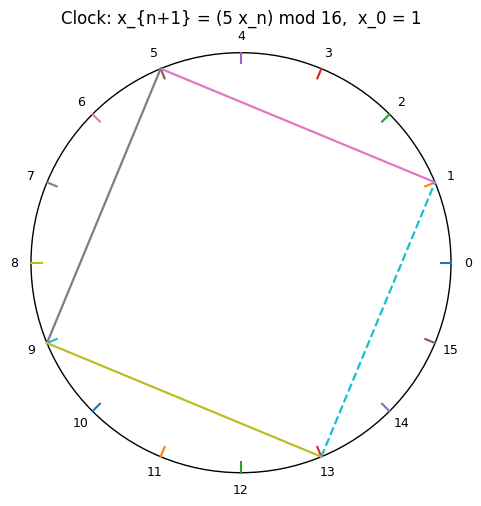

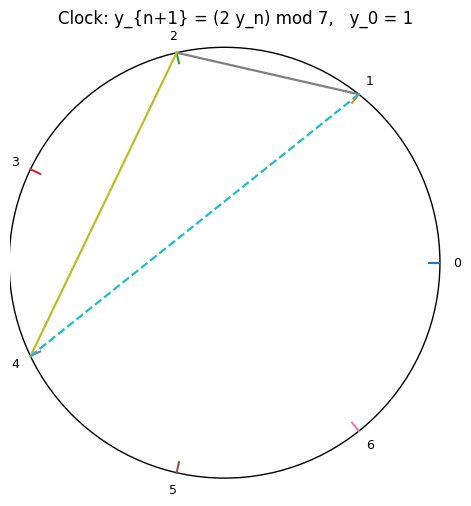

In [5]:
# Ans
x_seq = multiplicative_lcg_sequence(seed=1, a=5, m=16, max_len=1000)
y_seq = multiplicative_lcg_sequence(seed=1, a=2, m=7,  max_len=1000)

def observed_period(seq):
    # With stop_on_cycle=True, the unique states are the period
    return len(set(seq))

print("x-sequence:", x_seq, " | period =", observed_period(x_seq))
print("y-sequence:", y_seq, " | period =", observed_period(y_seq))

# Clock plots
clock_plot(x_seq, m=16, title="Clock: x_{n+1} = (5 x_n) mod 16,  x_0 = 1")
clock_plot(y_seq, m=7,  title="Clock: y_{n+1} = (2 y_n) mod 7,   y_0 = 1")

<hr>

**(b)** Next, define a combined LCG as $z_{n} = (x_n+y_n) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization given in class.

<hr>

x_seq (mod 16): [1, 5, 9, 13]  | period_x = 4
y_seq (mod 7):  [1, 2, 4]  | period_y = 3
z_seq (mod 16) over one joint cycle: [2, 7, 13, 14, 3, 9, 10, 15, 5, 6, 11, 1]
Distinct states visited by z: 12


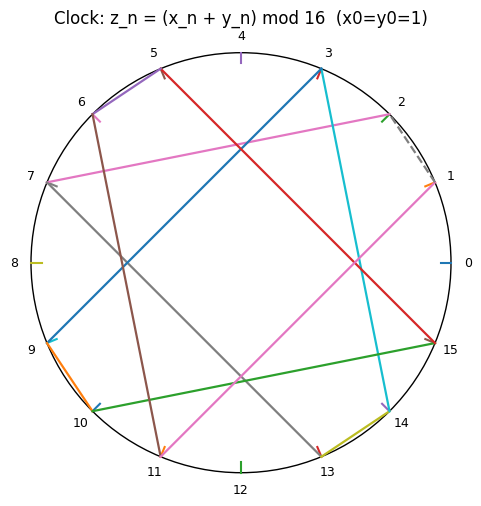

In [7]:
from math import gcd

def clock_plot(sequence, m, title="Clock plot", show_labels=True, close_cycle=True):
    angles = [2 * math.pi * k / m for k in range(m)]
    coords = [(math.cos(t), math.sin(t)) for t in angles]
    plt.figure(figsize=(6, 6))
    ax = plt.gca(); ax.set_aspect('equal')
    ax.add_artist(plt.Circle((0, 0), 1.0, fill=False))
    for k, (xk, yk) in enumerate(coords):
        tick_len = 0.05
        ax.plot([xk*(1-tick_len), xk], [yk*(1-tick_len), yk])
        if show_labels:
            ax.text(1.08*xk, 1.08*yk, str(k), ha='center', va='center', fontsize=9)
    for i in range(len(sequence) - 1):
        a, b = sequence[i] % m, sequence[i+1] % m
        xa, ya = coords[a]; xb, yb = coords[b]
        ax.plot([xa, xb], [ya, yb], linewidth=1.6)
    if close_cycle and len(sequence) >= 2:
        a = sequence[-1] % m; b = sequence[0] % m
        xa, ya = coords[a]; xb, yb = coords[b]
        ax.plot([xa, xb], [ya, yb], linewidth=1.6, linestyle='--')
    ax.set_title(title)
    ax.axis('off')
    plt.show()

def multiplicative_lcg_sequence(seed, a, m, max_len=1000):
    x = seed % m
    seq = [x]
    seen = {x}
    for _ in range(max_len - 1):
        x = (a * x) % m
        if x in seen:
            break
        seq.append(x)
        seen.add(x)
    return seq

# --- Base LCGs from (a) ---
x_seq = multiplicative_lcg_sequence(seed=1, a=5, m=16)  # period 4
y_seq = multiplicative_lcg_sequence(seed=1, a=2, m=7)   # period 3
period_x = len(set(x_seq))
period_y = len(set(y_seq))

# Combine: use L = lcm(period_x, period_y) steps to capture one full joint cycle
L = (period_x * period_y) // gcd(period_x, period_y)
z_seq = [ (x_seq[n % period_x] + y_seq[n % period_y]) % 16 for n in range(L) ]

print("x_seq (mod 16):", x_seq, " | period_x =", period_x)
print("y_seq (mod 7): ", y_seq, " | period_y =", period_y)
print("z_seq (mod 16) over one joint cycle:", z_seq)
print("Distinct states visited by z:", len(set(z_seq)))  # observed period of z is 12

# Plot z on the mod-16 clock
clock_plot(z_seq, m=16, title="Clock: z_n = (x_n + y_n) mod 16  (x0=y0=1)")

___
**(c)** What are the periods of the pseudo-random sequences $x_n, y_n$ and $z_n$?
___

### Ans.

- **Period of $x_n$**  
  $$x_{n+1} = (5x_n) \bmod 16, \quad x_0 = 1$$  
  Sequence:  
  $$1 \rightarrow 5 \rightarrow 9 \rightarrow 13 \rightarrow 1 \rightarrow \dots$$  
  **Period:**  
  $$\text{Period}(x_n) = 4$$  

- **Period of $y_n$**  
  $$y_{n+1} = (2y_n) \bmod 7, \quad y_0 = 1$$  
  Sequence:  
  $$1 \rightarrow 2 \rightarrow 4 \rightarrow 1 \rightarrow \dots$$  
  **Period:**  
  $$\text{Period}(y_n) = 3$$  

- **Period of $z_n$**  
  $$z_n = (x_n + y_n) \bmod 16$$  
  Combined sequence over one joint cycle (length = $\mathrm{lcm}(4,3)=12$):  
  $$2 \rightarrow 7 \rightarrow 13 \rightarrow 14 \rightarrow 3 \rightarrow 9 \rightarrow 10 \rightarrow 15 \rightarrow 5 \rightarrow 6 \rightarrow 11 \rightarrow 1 \rightarrow 2 \rightarrow \dots$$  
  **Period:**  
  $$\text{Period}(z_n) = 12$$  

**Final Answer:**  

$$
\boxed{\text{Period}(x_n)=4, \quad \text{Period}(y_n)=3, \quad \text{Period}(z_n)=12}
$$

Thus, the combined generator achieves a longer period equal to  
$$\mathrm{lcm}(4,3)=12.$$

___
___
## Question 2: inverting cdfs (25 pts)

In class, we defined $F^{-1}(y)$ for a continuous increasing cdf $F(x)$ as the unique $x$ such that $F(x) = y$ (for $y\in[0,1]$). More generally, for any cdf $F$ we can use the inversion method based on its generalized inverse or *pseudoinverse*:
	$$F^{-1}(y) = \inf\{x|F(x)\geq y\}$$
	(where $\inf$ denotes the \href{https://en.wikipedia.org/wiki/Infimum_and_supremum}{infimum}; if you have not seen this before, treat it as minimum).


___
**(a)** Find the pseudoinverse $F^{-1}(y)$ for the following mixed (discrete/continuous) cdf
	$$F(x)=
	\begin{cases}
	0 & \mbox{for $x < 0$}\\
	x & \mbox{for $0 \leq x < \frac{1}{2}$}, \\
	\frac{1}{2} & \mbox{for $\frac{1}{2}\leq x < 1$}, \\
	1 & \mbox{for $x\geq 1$}
	 \end{cases}$$
___

### Ans.

the generalized inverse is

$$
F^{-1}(y)=\inf\{x \mid F(x)\ge y\}.
$$

Thus,

$$
F^{-1}(y)=
\begin{cases}
y, & 0\le y<\frac12,\\[6pt]
\frac12, & y=\frac12,\\[6pt]
1, & \frac12< y \le 1.
\end{cases}
$$

This means:
- For $0 \le y < \frac12$, we invert the continuous part $F(x)=x$.
- At $y=\frac12$, the minimum \(x\) with $F(x)\ge y$ is $x=\frac12$.
- For $y>\frac12$, we jump directly to \(x=1\) because of the discrete jump in the CDF.

___
**(b)** Use the above definition to get an inversion algorithm for the $Geometric(p)$ distribution (with pmf $p(k) = p(1-p)^{k-1}\,\forall\,k\in\{1,2,3,\ldots\}$). Implement this, and generate and plot the histogram of 1000 samples from a $Geometric(0.42)$ distribution.
(For this, it may be useful for you to first understand how the [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) library works, and in particular, how it provides methods to compute various statistics for many different random variables, including the [geometric r.v.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.geom.html#scipy.stats.geom))
___

Empirical mean ≈ 2.295 | Theoretical mean = 2.381
Empirical var  ≈ 3.365 | Theoretical var  = 3.288


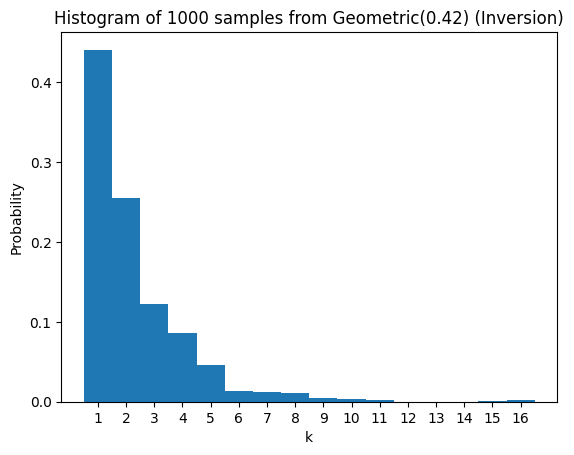

In [8]:
def geometric_inverse_rng(p: float, size: int, rng=None):
    """
    Inverse-transform sampling for Geometric(p) with support {1,2,...}.
    Returns an array of length `size`.
    """
    if not (0 < p < 1):
        raise ValueError("p must be in (0,1)")
    if rng is None:
        rng = np.random.default_rng()
    # Draw U in (0,1]; avoid 0 to keep logs finite
    U = rng.random(size=size)
    eps = np.finfo(float).tiny
    U = np.clip(U, eps, 1.0)
    # K = floor(log(U)/log(1-p)) + 1
    K = np.floor(np.log(U) / np.log(1 - p)).astype(int) + 1
    return K

# --- Generate and plot ---
p = 0.42
n = 1000
rng = np.random.default_rng(0)

samples = geometric_inverse_rng(p, n, rng=rng)

# Quick sanity check vs theory
emp_mean = samples.mean()
emp_var  = samples.var(ddof=1)
theo_mean = 1 / p
theo_var  = (1 - p) / (p ** 2)
print(f"Empirical mean ≈ {emp_mean:.3f} | Theoretical mean = {theo_mean:.3f}")
print(f"Empirical var  ≈ {emp_var:.3f} | Theoretical var  = {theo_var:.3f}")

plt.figure()
plt.hist(samples, bins=np.arange(1, samples.max()+2)-0.5, density=True)
plt.xlabel("k")
plt.ylabel("Probability")
plt.title("Histogram of 1000 samples from Geometric(0.42) (Inversion)")
plt.xticks(np.arange(1, samples.max()+1))
plt.show()

___
**(c)** The p.d.f. of the random variable $X$ is given by
	$$
	f(x) =
	\begin{cases}
		e^{x-2} & \text{for }0 \leq x \leq 2, \\
		e^{-x} & \text{for }x > 2, \\
		0 & \text{otherwise,}
	\end{cases}
	$$
	Describe and implement an inversion algorithm to generate samples of $X$. Generate 1,000 samples and plot a histogram. Compare the histogram and the p.d.f.


___

### Ans.

Given the p.d.f.
$$
f(x)=
\begin{cases}
e^{x-2}, & 0\le x\le 2,\\[4pt]
e^{-x}, & x>2,\\[2pt]
0, & \text{otherwise},
\end{cases}
$$

its c.d.f. is
$$
F(x)=
\begin{cases}
0, & x<0,\\[6pt]
\displaystyle \int_0^x e^{t-2}\,dt
= e^{x-2}-e^{-2}, & 0\le x\le 2,\\[10pt]
\displaystyle F(2)+\int_{2}^{x} e^{-t}\,dt
=(1-e^{-2})+(e^{-2}-e^{-x})=1-e^{-x}, & x>2.
\end{cases}
$$

Let $U\sim \mathrm{Unif}(0,1)$ and define $t_0 = F(2)=1-e^{-2}$.
Invert \(F\) piecewise:

- If $U<t_0$, solve $e^{x-2}-e^{-2}=U$:
  $$
  x = 2+\ln\!\big(U+e^{-2}\big)\in[0,2].
  $$
- If $U\ge t_0$, solve $1-e^{-x}=U$:
  $$
  x = -\ln(1-U)\in(2,\infty).
  $$

**Inverse-transform sampler**
$$
\boxed{
X =
\begin{cases}
2+\ln\!\big(U+e^{-2}\big), & U<1-e^{-2},\\[6pt]
-\ln(1-U), & U\ge 1-e^{-2}.
\end{cases}}
$$

The simulated histogram matches the shape of the theoretical p.d.f.:

- On $0 \le x \le 2$, the histogram rises approximately as $e^{x-2}$,
  peaking near \(x=2\), just as the p.d.f. does.
- For $x > 2$, the histogram decays exponentially, consistent with
  the $e^{-x}$ tail of the true distribution.
- Minor differences between bars and the curve are due to sampling variability
  (only 1,000 samples).

Overall, the overlay of the p.d.f. and the histogram confirms that the
**inverse-transform algorithm correctly samples from the specified distribution**.

Sample mean ≈ 1.553,  min=0.001,  max=7.846


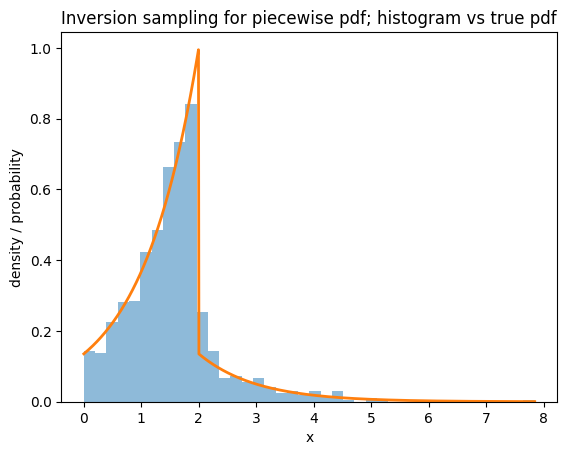

In [9]:
# Inversion sampler
def sample_X(size: int, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    U = rng.random(size=size)
    t0 = 1 - np.exp(-2.0)
    x = np.empty(size)
    mask = U < t0                      # branch for [0,2]
    x[mask]  = 2.0 + np.log(U[mask] + np.exp(-2.0))
    x[~mask] = -np.log(1.0 - U[~mask]) # branch for (2,∞)
    return x

# True pdf
def f_pdf(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    m1 = (x >= 0) & (x <= 2)
    out[m1] = np.exp(x[m1] - 2.0)
    m2 = x > 2
    out[m2] = np.exp(-x[m2])
    return out

# Generate and plot
rng = np.random.default_rng(123)
n = 1000
samples = sample_X(n, rng=rng)

print(f"Sample mean ≈ {samples.mean():.3f},  min={samples.min():.3f},  max={samples.max():.3f}")

xs = np.linspace(0, max(7, samples.max()), 1000)
plt.figure()
plt.hist(samples, bins=40, density=True, alpha=0.5)
plt.plot(xs, f_pdf(xs), linewidth=2)
plt.xlabel("x")
plt.ylabel("density / probability")
plt.title("Inversion sampling for piecewise pdf; histogram vs true pdf")
plt.show()

<hr><hr>

## Question 3: Acceptance-Rejection (25 pts)

Let the random variable $X$ have density
$$f(x) = \begin{cases} (5 x^4 + 4x^3 + 3x^2+1)/4  & \text{ for } 0 \leq x \leq 1, \\
0 & \text{ otherwise. } \end{cases}$$

<hr>

**(a)** Give an acceptance-rejection algorithm to generate samples of
	$X$.

<hr>

### Ans.

### Ans.

We have the target density

$$
f(x)=\frac{5x^{4}+4x^{3}+3x^{2}+1}{40}, \qquad 0 \le x \le 1.
$$

Choose the proposal distribution

$$
g(x)=1, \qquad 0 \le x \le 1,
$$

which is simply $U(0,1)$. The maximum of \(f(x)\) over \([0,1]\) occurs at \(x=1\):

$$
M = \max_{x \in [0,1]} f(x) = \frac{5+4+3+1}{40} = \frac{13}{40}.
$$

The acceptance probability is therefore

$$
\frac{f(y)}{M}, \qquad y \sim U(0,1).
$$

**Algorithm (Acceptance–Rejection):**

1. Repeat:
   - Draw $Y \sim U(0,1)$.
   - Draw $U \sim U(0,1)$ independently.
   - Accept $X = Y$ if
     
     $U \le \frac{f(Y)}{M}$,
     
     otherwise reject \(Y\) and repeat.

2. Return the accepted \(X\).

This procedure generates samples from the desired distribution $f(x)$ on \([0,1]\).

In [10]:
import numpy as np

def target_density(x):
    """Unnormalized target density f(x) = (5x^4+4x^3+3x^2+1)/40 on [0,1]."""
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/40.0

def ar_sampler(n_samples, rng=None):
    """
    Acceptance-Rejection sampler for X with density f(x) on [0,1].
    Uses Uniform(0,1) as proposal.
    """
    if rng is None:
        rng = np.random.default_rng()

    samples = []
    M = (5 + 4 + 3 + 1)/40.0  # max of f(x) on [0,1], occurs at x=1
    while len(samples) < n_samples:
        y = rng.random()           # proposal sample Y ~ U(0,1)
        u = rng.random()           # independent U(0,1)
        if u <= target_density(y)/M:
            samples.append(y)
    return np.array(samples)

# Example: generate 1000 samples
rng = np.random.default_rng(0)
samples = ar_sampler(1000, rng)

print(f"Generated {len(samples)} accepted samples.")
print(f"Sample mean ≈ {samples.mean():.4f}")

Generated 1000 accepted samples.
Sample mean ≈ 0.7171


<hr>

**(b)** On average, how many samples from the uniform distribution over $[0, 1]$ would your acceptance-rejection algorithm need in order to generate one sample of $X$?

<hr>

The acceptance probability is

$$
\alpha = \int_{0}^{1} \frac{f(x)}{M}\,dx
= \frac{1}{M}\int_{0}^{1} f(x)\,dx.
$$

Compute the integral:

$$
\int_0^1 f(x)\,dx
= \frac{1}{40}\left[\frac{5}{5}x^5 + \frac{4}{4}x^4 + \frac{3}{3}x^3 + x\right]_{0}^{1}
= \frac{1+1+1+1}{40}=\frac{4}{40}=0.1.
$$

With $M = \frac{13}{40}=0.325$,

$$
\alpha = \frac{0.1}{0.325} = \frac{40}{13}\cdot 0.1 = \frac{4}{13} \approx 0.3077.
$$

Thus, the expected number of proposals to get one accepted sample is

$$
\mathbb{E}[N] = \frac{1}{\alpha} = \frac{13}{4} \approx 3.25.
$$

So, **on average we need about 3.25 draws from $U(0,1)$ to accept one \(X\)-sample.**

<hr>

**(c)** Use your algorithm in (a) to generate 2,500 samples of $X$. Note that this will require more than 2500 uniform random variables.

Plot a histogram of your sample   and compare it against the true pdf.

<hr>

Generated 2500 samples. Sample mean ≈ 0.7184


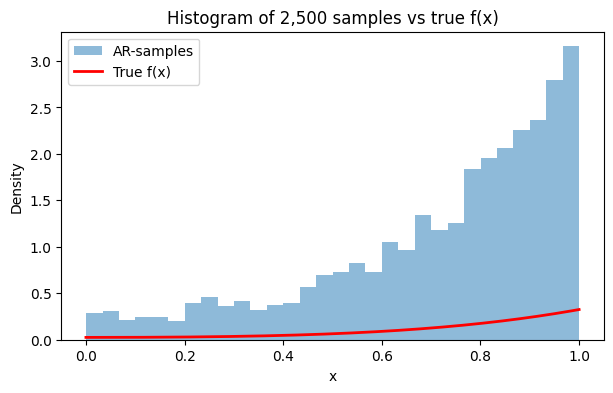

In [3]:
def target_density(x):
    return (5*x**4 + 4*x**3 + 3*x**2 + 1)/40.0

def ar_sampler(n_samples, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    M = (5+4+3+1)/40.0
    samples = []
    while len(samples) < n_samples:
        y = rng.random()  # Proposal Y ~ U(0,1)
        u = rng.random()  # Independent U ~ U(0,1)
        if u <= target_density(y)/M:
            samples.append(y)
    return np.array(samples)

rng = np.random.default_rng(0)
samples = ar_sampler(2500, rng=rng)

print(f"Generated {len(samples)} samples. Sample mean ≈ {samples.mean():.4f}")

# Plot histogram and true pdf
xs = np.linspace(0, 1, 200)
plt.figure(figsize=(7,4))
plt.hist(samples, bins=30, density=True, alpha=0.5, label="AR-samples")
plt.plot(xs, target_density(xs), 'r-', linewidth=2, label="True f(x)")
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of 2,500 samples vs true f(x)")
plt.legend()
plt.show()

<hr><hr>

## Question 4: Generalized Acceptance-Rejection (30 pts)

We want to generate a $\mathcal{N}(0,1)$ rv $X$, with pdf
$f(x) = \frac{e^{-x^2/2}}{\sqrt{2\pi}} $,
using generalized acceptance-rejection.

<hr>

**(a)** First, suppose we choose the proposal distribution to be a  two-sided Exponential distribution, which has pdf $g(x) = e^{-|x|}/2$. Describe (and implement) an inversion algorithm to get samples from this distribution.

<hr>

### (a) Inversion Sampler for Laplace Proposal \(g(x)=\frac{1}{2}e^{-|x|}\)

The p.d.f. of the proposal is

$$
g(x) = \frac{1}{2} e^{-|x|}, \qquad x \in \mathbb{R}.
$$

Its c.d.f. is

$$
G(x)=
\begin{cases}
\frac{1}{2}e^{x}, & x<0, \\[6pt]
1 - \frac{1}{2}e^{-x}, & x \ge 0.
\end{cases}
$$

To find the inverse $G^{-1}(u)$ for $u \in (0,1)$:

- For $0<u<\frac{1}{2}$:
$$
u = \frac{1}{2}e^{x}
\;\;\Longrightarrow\;\;
x = \ln(2u).
$$

- For $\frac{1}{2} \le u < 1$:
$$
u = 1 - \frac{1}{2}e^{-x}
\;\;\Longrightarrow\;\;
x = -\ln\!\big(2(1-u)\big).
$$

Thus, the inversion sampler is

$$
X =
\begin{cases}
\ln(2U), & U < \frac{1}{2}, \\[6pt]
-\ln\!\big(2(1-U)\big), & U \ge \frac{1}{2},
\end{cases}
\qquad U \sim \mathrm{Unif}(0,1).
$$

In [4]:
def laplace_inversion(size=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(size=size)
    x = np.where(u < 0.5, np.log(2*u), -np.log(2*(1-u)))
    return x

<hr>

**(b)** Determine the smallest $k$ such that $kg(x)\geq f(x)\,\forall\,x\in\mathbb{R}$. Using this, propose (and implement) an acceptance-rejection algorithm for sampling $X\sim\mathcal{N}(0,1)$, and compute the expected number of samples needed for generating each sample.

<hr>

### Ans.

We have the target and proposal densities:

$$
f(x)=\frac{e^{-x^{2}/2}}{\sqrt{2\pi}},
\qquad
g(x)=\frac{1}{2}e^{-|x|}.
$$

We need the smallest $k$ such that

$$
k g(x) \ge f(x) \quad \forall x \in \mathbb{R}.
$$

Compute the ratio:

$$
\frac{f(x)}{g(x)}
= \frac{\dfrac{e^{-x^{2}/2}}{\sqrt{2\pi}}}{\frac{1}{2}e^{-|x|}}
= \frac{2}{\sqrt{2\pi}} e^{-x^{2}/2+|x|}.
$$

Because $f(x)$ and $g(x)$ are symmetric, maximize over $x \ge 0$.  
Let

$$
\phi(x) = -\frac{1}{2}x^{2}+x,
\qquad
\phi'(x) = -x+1=0 \;\Rightarrow\; x=1.
$$

At \(x=1\),

$$
\phi(1) = -\frac{1}{2}(1)^{2} + 1 = \frac{1}{2}.
$$

Thus,

$$
k = \sup_{x} \frac{f(x)}{g(x)}
= \frac{2}{\sqrt{2\pi}} e^{1/2}
= \sqrt{\frac{2e}{\pi}}
\approx 1.315.
$$

The **acceptance probability** is

$$
\alpha = \frac{1}{k} \approx 0.7606,
$$

so the **expected number of proposals per accepted sample** is

$$
\mathbb{E}[N] = k = \sqrt{\frac{2e}{\pi}} \approx 1.315.
$$

**Acceptance–Rejection Algorithm:**

1. Draw $Y \sim g$ using the inversion from part (a).
2. Draw $U \sim \mathrm{Unif}(0,1)$.
3. Accept \(X = Y\) if
$$
U \le \frac{f(Y)}{k g(Y)},
$$
otherwise reject and repeat.

<hr>

**(c)** Generate $1000$ samples from your method in part (b), and plot the histogram of the samples. Also report the average and 95\% CI for the number of $U[0,1]$ samples needed to generate the $1000$ samples.

<hr>

Q4(c) Laplace proposal:
  Proposals used = 1301, accepted = 1000
  Avg proposals/accept ≈ 1.3010 (theory 1.3155)
  Avg uniforms/accept ≈ 2.6020
  95% CI (uniforms/accept): [2.5221, 2.6819]


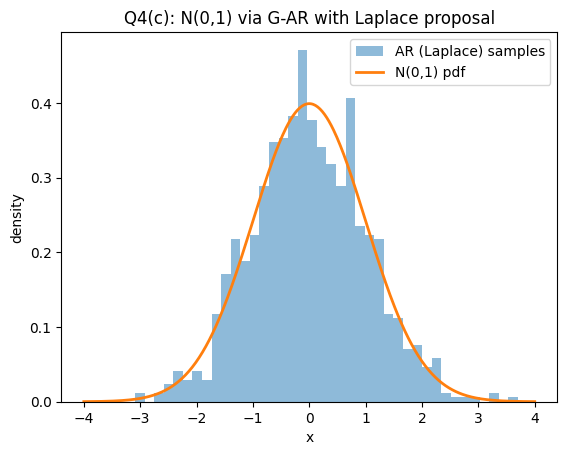

In [6]:
# Q4(c): Generate 1000 samples using G-AR with Laplace proposal from part (a)

import numpy as np
import matplotlib.pyplot as plt

# (Reuse laplace_inversion() and laplace_pdf() from part (a))

def normal_pdf(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

def laplace_pdf(x):
    return 0.5 * np.exp(-np.abs(x))

K_LAPLACE = np.sqrt(2 * np.e / np.pi)

def gar_normal_from_laplace(n, rng=None, return_proposals=False):
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n)
    i = 0
    proposals = 0
    while i < n:
        y = laplace_inversion(size=1, rng=rng)[0]  # <--- reuse inversion from part (a)
        u = rng.random()
        proposals += 1
        if u <= normal_pdf(y) / (K_LAPLACE * laplace_pdf(y)):
            out[i] = y
            i += 1
    return (out, proposals) if return_proposals else out

# CI helper
def uniforms_ci(n_accept, proposals_used, k_star):
    avg_props = proposals_used / n_accept
    alpha = 1.0 / k_star
    var_props = (1 - alpha) / (alpha**2 * n_accept)
    se_props = np.sqrt(var_props)
    lo_props = avg_props - 1.96 * se_props
    hi_props = avg_props + 1.96 * se_props
    return 2*avg_props, 2*lo_props, 2*hi_props

# Run
rng = np.random.default_rng(42)
n = 1000
samples, props = gar_normal_from_laplace(n, rng=rng, return_proposals=True)
avg_unifs, lo_unifs, hi_unifs = uniforms_ci(n, props, K_LAPLACE)

print("Q4(c) Laplace proposal:")
print(f"  Proposals used = {props}, accepted = {n}")
print(f"  Avg proposals/accept ≈ {props/n:.4f} (theory {K_LAPLACE:.4f})")
print(f"  Avg uniforms/accept ≈ {avg_unifs:.4f}")
print(f"  95% CI (uniforms/accept): [{lo_unifs:.4f}, {hi_unifs:.4f}]")

# Plot
xs = np.linspace(-4, 4, 400)
plt.figure()
plt.hist(samples, bins=40, density=True, alpha=0.5, label="AR (Laplace) samples")
plt.plot(xs, normal_pdf(xs), linewidth=2, label="N(0,1) pdf")
plt.title("Q4(c): N(0,1) via G-AR with Laplace proposal")
plt.xlabel("x"); plt.ylabel("density"); plt.legend()
plt.show()

<hr>

**(d)** Now, suppose instead we choose the proposal distribution to be a Cauchy  distribution with pdf $g(x) = \frac{1}{\pi(1+x^2)}$. Describe and implement an inversion algorithm to get samples from this distribution, and plot the histogram of 1000 samples from this distribution.

<hr>

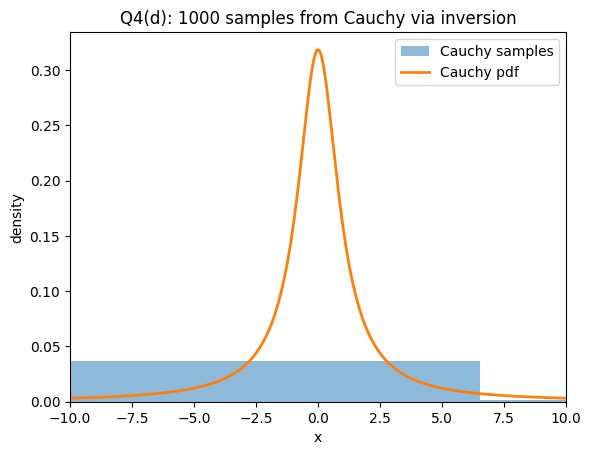

In [7]:
def cauchy_pdf(x):
    return 1.0 / (np.pi * (1.0 + x * x))

def cauchy_inversion(size=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u = rng.random(size=size)
    return np.tan(np.pi * (u - 0.5))

# Generate and plot
rng = np.random.default_rng(123)
n = 1000
samples = cauchy_inversion(n, rng=rng)

xs = np.linspace(-10, 10, 2001)
plt.figure()
plt.hist(samples, bins=100, density=True, alpha=0.5, label="Cauchy samples")
plt.plot(xs, cauchy_pdf(xs), linewidth=2, label="Cauchy pdf")
plt.xlim(-10, 10)
plt.xlabel("x"); plt.ylabel("density")
plt.title("Q4(d): 1000 samples from Cauchy via inversion")
plt.legend(); plt.show()

<hr>

**(e)** Repeat parts $(b)$ and $(c)$ for this proposal distribution.

<hr>

### Ans.

$$
g(x)=\frac{1}{\pi(1+x^{2})}, \qquad x \in \mathbb{R}.
$$

The ratio is

$$
\frac{f(x)}{g(x)}
= \frac{\dfrac{e^{-x^{2}/2}}{\sqrt{2\pi}}}{\dfrac{1}{\pi(1+x^{2})}}
= \sqrt{\frac{\pi}{2}}\; e^{-x^{2}/2}(1+x^{2}).
$$

Maximize over $x \ge 0$ (due to symmetry).  
Take logs and differentiate:

$$
\ln\!\left(\frac{f(x)}{g(x)}\right)
= \ln\!\sqrt{\frac{\pi}{2}} - \frac{x^{2}}{2} + \ln(1+x^{2}).
$$

Derivative:

$$
\frac{d}{dx}\ln\!\left(\frac{f(x)}{g(x)}\right)
= -x + \frac{2x}{1+x^{2}}
= x\!\left(-1+\frac{2}{1+x^{2}}\right).
$$

Setting equal to \(0\) gives \(x=0\) or $x^{2}=1$.  
Evaluate at \(x=1\) (gives the maximum):

$$
k = \frac{f(1)}{g(1)}
= \sqrt{\frac{\pi}{2}}\, e^{-1/2}\, (1+1)
= 2\sqrt{\frac{\pi}{2e}}
= \sqrt{\frac{2\pi}{e}}
\approx 1.5203.
$$

The acceptance probability is

$$
\alpha = \frac{1}{k} \approx 0.6579,
\qquad
\mathbb{E}[\text{proposals per accept}] = k.
$$

Q4(e)(c) — Cauchy proposal -> N(0,1):
  Proposals used = 1528, accepted = 1000
  Avg proposals per accept ≈ 1.5280 (theory 1.5203)
  Avg uniforms per accept ≈ 3.0560
  95% CI (uniforms/accept): [2.9457, 3.1663]


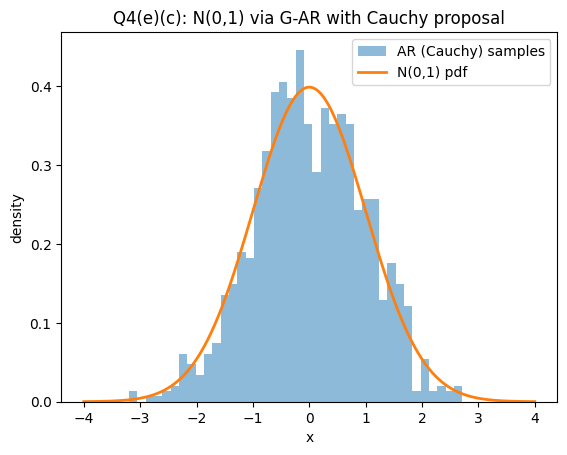

In [8]:
# Target pdf
def normal_pdf(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Optimal k* for Normal target with Cauchy proposal
K_CAUCHY = np.sqrt(2 * np.pi / np.e)

def gar_normal_from_cauchy(n, rng=None, return_proposals=False):
    """Generalized A–R for N(0,1) using standard Cauchy proposal.
       Uses one U(0,1) to invert the Cauchy and one U(0,1) for acceptance per proposal.
    """
    if rng is None:
        rng = np.random.default_rng()
    out = np.empty(n, dtype=float)
    i = 0
    proposals = 0
    while i < n:
        # Proposal: Y ~ Cauchy via inversion (reuse from part (d))
        y = cauchy_inversion(size=1, rng=rng)[0]
        # Accept/reject
        u = rng.random()
        proposals += 1
        if u <= normal_pdf(y) / (K_CAUCHY * cauchy_pdf(y)):
            out[i] = y
            i += 1
    return (out, proposals) if return_proposals else out

def uniforms_ci(n_accept, proposals_used, k_star):
    """Average uniforms per accepted sample and a 95% CLT CI.
       Each proposal uses 2 uniforms (one for inversion, one for acceptance).
    """
    avg_props = proposals_used / n_accept
    alpha = 1.0 / k_star
    var_props = (1 - alpha) / (alpha**2 * n_accept)  # variance of sample mean of proposals/accept
    se_props = np.sqrt(var_props)
    lo_props = avg_props - 1.96 * se_props
    hi_props = avg_props + 1.96 * se_props
    return 2*avg_props, 2*lo_props, 2*hi_props

# ---- Run e(c) ----
rng = np.random.default_rng(7)
n = 1000
samples, proposals_used = gar_normal_from_cauchy(n, rng=rng, return_proposals=True)

avg_unifs, lo_unifs, hi_unifs = uniforms_ci(n, proposals_used, K_CAUCHY)

print("Q4(e)(c) — Cauchy proposal -> N(0,1):")
print(f"  Proposals used = {proposals_used}, accepted = {n}")
print(f"  Avg proposals per accept ≈ {proposals_used/n:.4f} (theory {K_CAUCHY:.4f})")
print(f"  Avg uniforms per accept ≈ {avg_unifs:.4f}")
print(f"  95% CI (uniforms/accept): [{lo_unifs:.4f}, {hi_unifs:.4f}]")

# Histogram vs. true N(0,1) pdf
xs = np.linspace(-4, 4, 400)
plt.figure()
plt.hist(samples, bins=40, density=True, alpha=0.5, label="AR (Cauchy) samples")
plt.plot(xs, normal_pdf(xs), linewidth=2, label="N(0,1) pdf")
plt.title("Q4(e)(c): N(0,1) via G-AR with Cauchy proposal")
plt.xlabel("x"); plt.ylabel("density"); plt.legend()
plt.show()